<a href="https://colab.research.google.com/github/tobyzawthuhtet/built-up-area-detection-using-deep-learning/blob/main/Built_Up_Area_classification_using_Sentinel_2_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyrsgis

In [2]:
  
import os
import numpy as np
from tensorflow import keras
from pyrsgis import raster
from pyrsgis.convert import changeDimension
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

import glob

Warning! matplotlib_scalebar library not found. You may not be able to export map directly.


In [3]:
os.chdir('/content/drive/MyDrive/Build Up extraction using DL')

In [4]:
data = glob.glob("*.tif")
for i in data:
  print(i)

training_labels2.tif
Sentinel 2.tif
testing_data.tif
testing_dataS2.tif


In [5]:
mxTraining = 'Sentinel 2.tif'
builtupTraining = 'training_labels2.tif'
mxTesting = 'testing_dataS2.tif'
#mxYangon='Clip_Composite_L5.tif'

In [6]:
ds1, featuresTrain = raster.read(mxTraining, bands='all')
ds2, labelTrain = raster.read(builtupTraining, bands=1)
ds3, featuresTest = raster.read(mxTesting, bands='all')
#ds4, featuresYangon = raster.read(mxYangon ,bands='all')


In [7]:
print("Bangalore Multispectral image shape: ", featuresTrain.shape)
print("Bangalore Binary built-up image shape: ", labelTrain.shape)
print("Hyderabad Multispectral image shape: ", featuresTest.shape)
#print('Yangon Multispectral image shape: ', featuresYangon.shape)

Bangalore Multispectral image shape:  (13, 1546, 1652)
Bangalore Binary built-up image shape:  (1546, 1652)
Hyderabad Multispectral image shape:  (13, 1513, 1370)


In [8]:
labelTrain = (labelTrain == 1).astype(int)

In [9]:
print("Training Multispectral image shape: ", featuresTrain.shape)
print("Training Binary built-up image shape: ", labelTrain.shape)
print("Testing Multispectral image shape: ", featuresTest.shape)
#print("Yangon Multispectral image shape:", featuresYangon.shape)


Bangalore Multispectral image shape:  (13, 1546, 1652)
Bangalore Binary built-up image shape:  (1546, 1652)
Hyderabad Multispectral image shape:  (13, 1513, 1370)


In [10]:
featuresTrain = changeDimension(featuresTrain)
labelTrain = changeDimension (labelTrain)
featuresTest = changeDimension(featuresTest)
#featuresYangon= changeDimension(featuresYangon)
nBands = featuresTrain.shape[1]

In [11]:
xTrain, xTest, yTrain, yTest = train_test_split(featuresTrain, labelTrain, test_size=0.4, random_state=42)


In [12]:
print(xTrain.shape)
print(yTrain.shape)

print(xTest.shape)
print(yTest.shape)

(1532395, 13)
(1532395,)
(1021597, 13)
(1021597,)


In [13]:
xTrain = xTrain / 255.0
xTest = xTest / 255.0
featuresTest = featuresTest / 255.0
#featuresYangon=featuresYangon/255.0


In [14]:
xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))
#featuresYangon = featuresYangon.reshape((featuresYangon.shape[0], 1, featuresYangon.shape[1]))


In [15]:
featuresTest = featuresTest.reshape((featuresHyderabad.shape[0], 1, featuresHyderabad.shape[1]))


In [16]:
print(xTrain.shape, xTest.shape,featuresTest.shape)

(1532395, 1, 13) (1021597, 1, 13) (2072810, 1, 13)


In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1, nBands)),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(2, activation='softmax')])

# Define the accuracy metrics and parameters
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Run the model
history = model.fit(xTrain, yTrain,batch_size=10 ,validation_split=0.3, epochs=5)

Epoch 1/5
107268/107268 [==============================] - 148s 1ms/step - loss: 0.3184 - accuracy: 0.8681 - val_loss: 0.2366 - val_accuracy: 0.9023
Epoch 2/5
107268/107268 [==============================] - 146s 1ms/step - loss: 0.2053 - accuracy: 0.9126 - val_loss: 0.2039 - val_accuracy: 0.9140
Epoch 3/5
107268/107268 [==============================] - 148s 1ms/step - loss: 0.1952 - accuracy: 0.9169 - val_loss: 0.1826 - val_accuracy: 0.9217
Epoch 4/5
107268/107268 [==============================] - 145s 1ms/step - loss: 0.1890 - accuracy: 0.9199 - val_loss: 0.1831 - val_accuracy: 0.9226
Epoch 5/5
107268/107268 [==============================] - 146s 1ms/step - loss: 0.1850 - accuracy: 0.9213 - val_loss: 0.1805 - val_accuracy: 0.9240


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


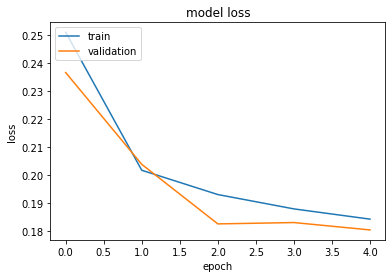

<Figure size 432x288 with 0 Axes>

In [18]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Model loss.jpg')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


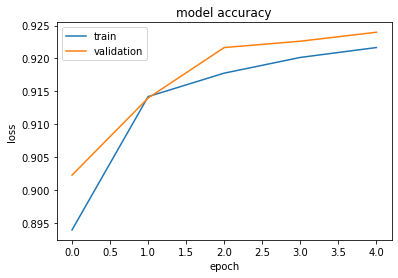

<Figure size 432x288 with 0 Axes>

In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Model Accuracy.jpg')

In [20]:
os.getcwd()

'/content/drive/My Drive/Build Up extraction using DL'

In [21]:
yTestPredicted = model.predict(xTest)
yTestPredicted = yTestPredicted[:,1]

In [22]:
yTestPredicted = (yTestPredicted>0.5).astype(int)
cMatrix = confusion_matrix(yTest, yTestPredicted)
pScore = precision_score(yTest, yTestPredicted)
rScore = recall_score(yTest, yTestPredicted)
print("Confusion matrix: for 14 nodes\n", cMatrix)
print("\nP-Score: %.3f, R-Score: %.3f" % (pScore, rScore))


Confusion matrix: for 14 nodes
 [[660398  40884]
 [ 36532 283783]]

P-Score: 0.874, R-Score: 0.886


In [24]:
predicted = model.predict(featuresTest)
predicted = predicted[:,1]

In [25]:
prediction = np.reshape(predicted, (ds3.RasterYSize, ds3.RasterXSize))
outFile = 'Test_BuiltupNN_predicted.tif'
raster.export(prediction, ds3, filename=outFile, dtype='float')

In [26]:
ls

'Model Accuracy.jpg'   Test_BuiltupNN_predicted.tif   training_labels2.tif
'Model loss.jpg'       testing_dataS2.tif
'Sentinel 2.tif'       testing_data.tif


In [29]:
model.save('/content/drive/MyDrive/Build Up extraction using DL/builduparea_detection_version1.h5')